In [1]:
import pygrib

In [2]:
data = pygrib.open('fnl_20181214_00_00.grib2')

In [3]:
data.messages    ## 表示文件中总共有多少条数据

353

获取353条数据的信息

In [4]:
for d in data:
    print(d)

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000
2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000
3:224:224 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000
4:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201812140000
5:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000
6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000
7:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000
8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000
10:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000

1 表示数据序号

U component of wind 表示变量名称

m s**-1 (instant) 是单位

regular_ll 坐标网格类型

level 层

fcst time 时间信息

pygrib 打开文件之后产生文件对象，并且提供了一些类似二进制操作的方法，比如 
`.rewind` 返回到文件头，`.tell` 获取当前所在位置， `.seek` 跳到指定位置
`.read` 读取多少个数据

In [5]:
data.rewind()  # 回到开头

In [6]:
data.read(10)   # 获取前10个记录

[1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000,
 2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000,
 3:224:224 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201812140000,
 4:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201812140000,
 5:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 7:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 10:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:

In [7]:
data.tell()    # 获取当前所在记录位置

10

In [8]:
data.seek(20)   # 跳到第20个记录

除了按照二进制的形式获取数据之外，还可以使用索引的形式

In [9]:
data[10]

10:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000

按照上述命令得到的信息，我们可以获取到相关的变量，变量类型，还有一些其他信息，比如时间，变量垂直层等。下面我们以温度为例，说一下怎么获取数据

获取数据时，可以使用 `.select` 方法， `data.select?` 可以查看帮助，从帮助的示例中可以得到 `.select` 方法的一些参数

In [10]:
data.select(name='Temperature')  ## 仅给定变量名称则返回当前变量所有相关数据，有各垂直压力层，不同高度等

[6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 12:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201812140000,
 18:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 0 hrs:from 201812140000,
 24:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 201812140000,
 30:Temperature:K (instant):regular_ll:isobaricInhPa:level 700 Pa:fcst time 0 hrs:from 201812140000,
 36:Temperature:K (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201812140000,
 43:Temperature:K (instant):regular_ll:isobaricInhPa:level 2000 Pa:fcst time 0 hrs:from 201812140000,
 50:Temperature:K (instant):regular_ll:isobaricInhPa:level 3000 Pa:fcst time 0 hrs:from 201812140000,
 57:Temperature:K (instant):regular_ll:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 201812140000,
 64:Temperature:K (instant):regular_ll:isobaricInhPa:level 7000 Pa:fcst time 0 hrs:from 

In [11]:
## 指定获取层的类型，可以选择获取指定类型层的数据，这对应了不同压力层的的数据
data.select(name='Temperature', typeOfLevel='isobaricInhPa')  

[6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201812140000,
 12:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201812140000,
 18:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 0 hrs:from 201812140000,
 24:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 201812140000,
 30:Temperature:K (instant):regular_ll:isobaricInhPa:level 700 Pa:fcst time 0 hrs:from 201812140000,
 36:Temperature:K (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201812140000,
 43:Temperature:K (instant):regular_ll:isobaricInhPa:level 2000 Pa:fcst time 0 hrs:from 201812140000,
 50:Temperature:K (instant):regular_ll:isobaricInhPa:level 3000 Pa:fcst time 0 hrs:from 201812140000,
 57:Temperature:K (instant):regular_ll:isobaricInhPa:level 5000 Pa:fcst time 0 hrs:from 201812140000,
 64:Temperature:K (instant):regular_ll:isobaricInhPa:level 7000 Pa:fcst time 0 hrs:from 

In [12]:
## 想获取指定层的数据，可以给出 level 参数，注意 level 的值的单位是 hPa
data.select(name='Temperature', typeOfLevel='isobaricInhPa', level=850)  

[198:Temperature:K (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 0 hrs:from 201812140000]

In [13]:
temp = data.select(name='Temperature', typeOfLevel='surface', level=0)[0]

In [14]:
temp.latlons()  ## 包含经纬度信息

(array([[ 90.,  90.,  90., ...,  90.,  90.,  90.],
        [ 89.,  89.,  89., ...,  89.,  89.,  89.],
        [ 88.,  88.,  88., ...,  88.,  88.,  88.],
        ..., 
        [-88., -88., -88., ..., -88., -88., -88.],
        [-89., -89., -89., ..., -89., -89., -89.],
        [-90., -90., -90., ..., -90., -90., -90.]]),
 array([[   0.,    1.,    2., ...,  357.,  358.,  359.],
        [   0.,    1.,    2., ...,  357.,  358.,  359.],
        [   0.,    1.,    2., ...,  357.,  358.,  359.],
        ..., 
        [   0.,    1.,    2., ...,  357.,  358.,  359.],
        [   0.,    1.,    2., ...,  357.,  358.,  359.],
        [   0.,    1.,    2., ...,  357.,  358.,  359.]]))

In [15]:
temp.projparams   ## 包含了投影参数信息

{'a': 6371229, 'b': 6371229, 'proj': 'cyl'}

In [16]:
temp.analDate  ## 时间信息

datetime.datetime(2018, 12, 14, 0, 0)

In [17]:
temp.data()  ## 返回所有数据，温度，纬度和经度

(array([[ 241.3150177 ,  241.3150177 ,  241.3150177 , ...,  241.3150177 ,
          241.3150177 ,  241.3150177 ],
        [ 242.11502075,  242.11502075,  242.11502075, ...,  242.4150238 ,
          242.3150177 ,  242.2150116 ],
        [ 247.61502075,  247.61502075,  247.61502075, ...,  247.7150116 ,
          247.7150116 ,  247.7150116 ],
        ..., 
        [ 254.9150238 ,  254.8150177 ,  254.8150177 , ...,  255.01501465,
          255.01501465,  254.9150238 ],
        [ 255.4150238 ,  255.3150177 ,  255.3150177 , ...,  255.51501465,
          255.4150238 ,  255.4150238 ],
        [ 260.31503296,  260.31503296,  260.31503296, ...,  260.31503296,
          260.31503296,  260.31503296]], dtype=float32),
 array([[ 90.,  90.,  90., ...,  90.,  90.,  90.],
        [ 89.,  89.,  89., ...,  89.,  89.,  89.],
        [ 88.,  88.,  88., ...,  88.,  88.,  88.],
        ..., 
        [-88., -88., -88., ..., -88., -88., -88.],
        [-89., -89., -89., ..., -89., -89., -89.],
        [-90., -

从经纬度信息可以看出，温度数据是1x1的网格大小。查看好数据信息之后，我们就可以着手绘图了

首先还是绘制全球的温度分布，这里要注意一个问题，如果使用Basemap设置投影时， `lon_0` 使用默认参数的话，东经和西经的数据的位置会相反，感兴趣的可以更改 
`lon_0` 的参数值测试一下

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import addcyclic

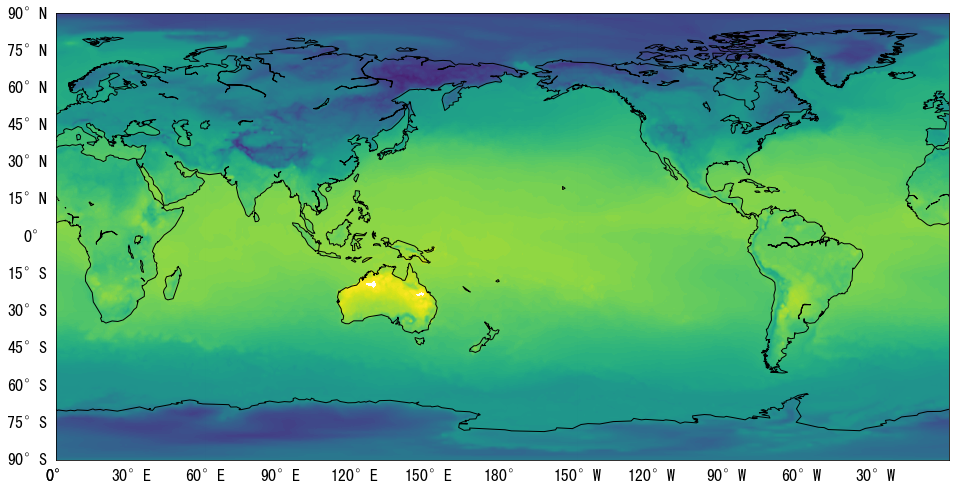

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))

lons = temp.data()[2][0,:]# - 180
lats = temp.data()[1][:,0]
tc = np.array(temp.data()[0]) #- 273.15

m = Basemap(projection=temp.projparams.get('proj'), lon_0=180, ax=ax) 

tc, lons = addcyclic(tc, lons)
lons, tc = m.shiftdata(lons, datain=tc)

lons, lats = np.meshgrid(lons, lats)

x, y = m(lons, lats)

con = m.contourf(x, y, tc, np.arange(220, 321))
#fig.colorbar(con)

_ = m.drawparallels(np.arange(-90, 91, 15), labels=[1,0,0,0], linewidth=0.001, fontsize=16)
_ = m.drawmeridians(np.arange(-180, 181, 30), labels=[0,0,0,1], linewidth=0.001, fontsize=16)

m.drawcoastlines()


Basemap 默认的坐标轴经纬度坐标的标记形式看起来很别扭。`drawmeridians` 和 `drawparallels` 方法提供了 `fmt` 参数用来自定义label的类型，
如下面两个函数所示：重点修改 return 返回的字符串形式

In [20]:
def lat2str(deg):
    min = 60 * (deg - np.floor(deg))
    deg = np.floor(deg)
    dir = 'N'
    if deg < 0:
        if min != 0.0:
            deg += 1.0
            min -= 60.0
        dir = 'S'
    return ("%d %s") % (np.abs(deg),dir)

def lon2str(deg):
    min = 60 * (deg - np.floor(deg))
    deg = np.floor(deg)
    dir = 'E'
    if deg < 0:
        if min != 0.0:
            deg += 1.0
            min -= 60.0
        dir = 'W'
    return ("%d %s") % (np.abs(deg),dir)

下面我们以中国的温度分布为例，添加边界文件，关于白化的部分后面再说

Text(0, 0.5, 'Temperature($\\circ$C)')

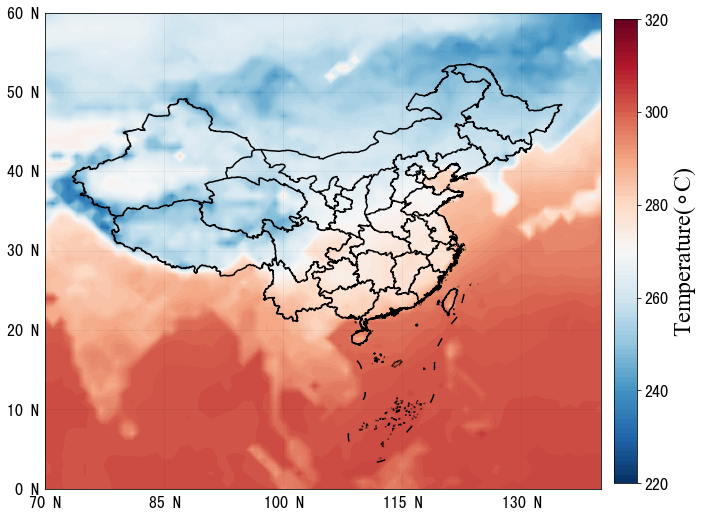

In [21]:
fig, ax = plt.subplots(figsize=(12, 9))

lons = temp.data()[2][0,:]
lats = temp.data()[1][:,0]
tc = np.array(temp.data()[0]) #- 273.15

lons, lats = np.meshgrid(lons, lats)

m = Basemap(projection=temp.projparams.get('proj'), lon_0=180, llcrnrlat=0, llcrnrlon=70, urcrnrlat=60, urcrnrlon=140, ax=ax)

x, y = m(lons, lats)

con = m.contourf(x, y, tc, np.arange(220, 321), cmap=plt.cm.RdBu_r)

_ = m.ax.set_xlim([70, 140])
_ = m.ax.set_ylim(0, 60)

_ = m.drawparallels(np.arange(0, 61, 10), labels=[1,0,0,0], linewidth=0.1, fontsize=16, fmt=lat2str, dashes=[2,2])
_ = m.drawmeridians(np.arange(70, 141, 15), labels=[0,0,0,1], linewidth=0.1, fontsize=16, fmt=lat2str, dashes=[2,2])
_ = m.readshapefile('中国行政区_包含南海九段线', 'china', linewidth=1.5)

cb = fig.colorbar(con, pad=0.02, shrink=0.95)
cb.set_ticks(np.arange(220, 321, 20))
cb.set_ticklabels(np.arange(220, 321, 20))
cb.ax.tick_params(labelsize=16)  ## 控制colorbar ticklables字体大小
cb.ax.set_ylabel('Temperature($\circ$C)', fontdict=dict(family='Times New Roman', fontsize=24))  # set colorbar yaxis label font


In [22]:
fig.savefig('temp.png', bbox_inches='tight')